<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Real_Data_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normality Test

In [ ]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [ ]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t -1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
    return paths

In [ ]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
M = 250
I = 250000
np.random.seed(99)

In [ ]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [ ]:
S0 * math.exp(r * T)

105.12710963760242

In [ ]:
paths[-1].mean()

np.float64(105.1169378510267)

Text(0, 0.5, 'index level')

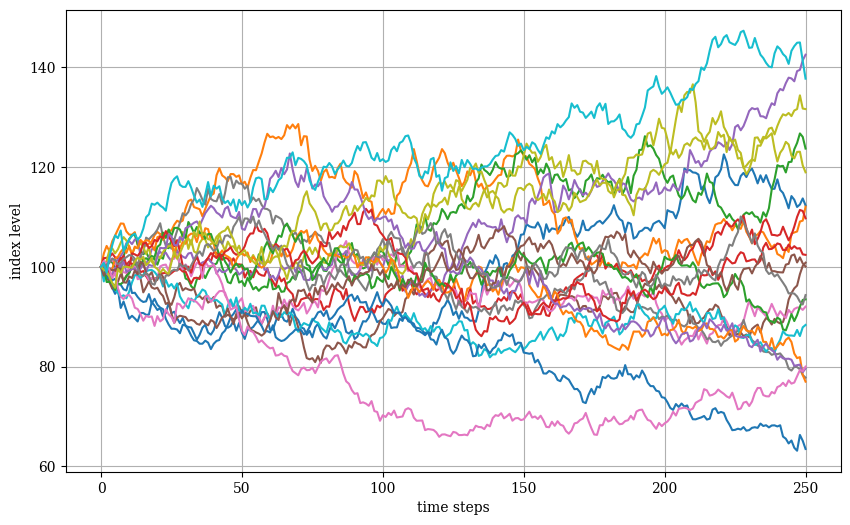

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :20])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [ ]:
paths[:, 0].round(4)

array([100.    ,  99.8334,  98.2786,  97.7087,  95.8066,  94.5665,
        95.5016,  91.7422,  93.0194,  91.2828,  89.5864,  90.1712,
        89.6371,  89.0293,  90.7297,  90.7251,  90.3621,  90.4108,
        92.9258,  92.195 ,  91.3298,  91.7002,  90.0565,  90.7157,
        92.7706,  90.6865,  90.9839,  89.6719,  88.69  ,  89.7248,
        88.1375,  87.9138,  87.8159,  86.6478,  85.3779,  86.3755,
        87.7785,  88.3756,  86.7917,  86.3919,  87.2882,  89.05  ,
        90.8917,  89.7667,  88.1079,  87.7784,  88.1122,  89.1069,
        87.1731,  88.7328,  86.7685,  85.5282,  87.3706,  87.5521,
        87.9289,  88.689 ,  89.4819,  90.8959,  90.9288,  89.5221,
        87.3657,  87.4137,  89.0744,  90.6672,  90.4154,  89.2647,
        88.9924,  89.8388,  91.5778,  89.9893,  89.2698,  87.8367,
        87.6015,  86.3565,  87.1559,  85.8533,  87.8455,  88.581 ,
        86.9985,  86.0615,  85.6048,  87.2208,  88.6046,  87.6745,
        89.0051,  90.0755,  89.3168,  86.9336,  86.5996,  87.1

In [ ]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [ ]:
log_returns[:, 0].round(4)

array([-0.0017, -0.0157, -0.0058, -0.0197, -0.013 ,  0.0098, -0.0402,
        0.0138, -0.0188, -0.0188,  0.0065, -0.0059, -0.0068,  0.0189,
       -0.    , -0.004 ,  0.0005,  0.0274, -0.0079, -0.0094,  0.004 ,
       -0.0181,  0.0073,  0.0224, -0.0227,  0.0033, -0.0145, -0.011 ,
        0.0116, -0.0178, -0.0025, -0.0011, -0.0134, -0.0148,  0.0116,
        0.0161,  0.0068, -0.0181, -0.0046,  0.0103,  0.02  ,  0.0205,
       -0.0125, -0.0187, -0.0037,  0.0038,  0.0112, -0.0219,  0.0177,
       -0.0224, -0.0144,  0.0213,  0.0021,  0.0043,  0.0086,  0.0089,
        0.0157,  0.0004, -0.0156, -0.0244,  0.0006,  0.0188,  0.0177,
       -0.0028, -0.0128, -0.0031,  0.0095,  0.0192, -0.0175, -0.008 ,
       -0.0162, -0.0027, -0.0143,  0.0092, -0.0151,  0.0229,  0.0083,
       -0.018 , -0.0108, -0.0053,  0.0187,  0.0157, -0.0106,  0.0151,
        0.012 , -0.0085, -0.027 , -0.0038,  0.0069, -0.0193,  0.0055,
        0.0193,  0.0159, -0.0008,  0.0088,  0.0176, -0.013 , -0.0146,
        0.0035, -0.0

In [ ]:
def print_statistics(array):
    '''  통계치 출력
    인수
    ====
    array : ndarray  통계치를 계산할 자료
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [ ]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  62500000.00000
           min        -0.07132
           max         0.07027
          mean         0.00012
           std         0.01265
          skew        -0.00011
      kurtosis         0.00070


In [ ]:
log_returns.mean() * M + 0.5 * sigma ** 2

np.float64(0.0499999999999999)

In [ ]:
log_returns.std() * math.sqrt(M)

np.float64(0.2000000000000003)

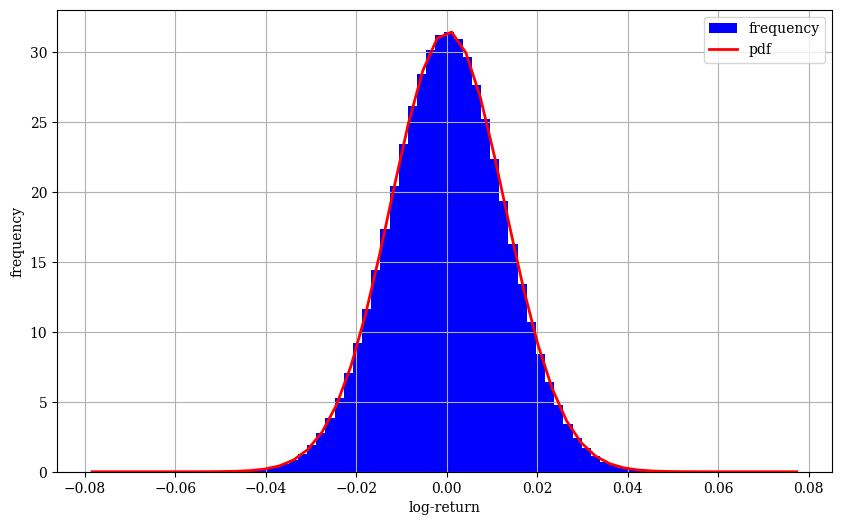

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency', color='b')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

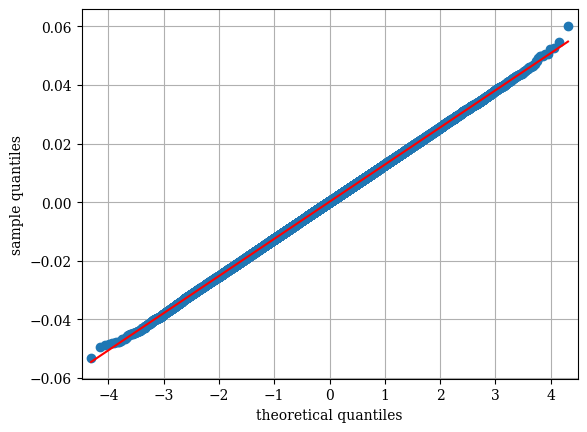

In [ ]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [ ]:
def normality_tests(arr):
    ''' 주어진 데이타가 정규분포인지 검정
    인수
    ====
    array: ndarray  통계치를 생성할 대상

    '''
    print("Skew of data set  %14.3f" %scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [ ]:
normality_tests(log_returns.flatten())

Skew of data set          -0.000
Skew test p-value          0.712
Kurt of data set           0.001
Kurt test p-value          0.260
Norm test p-value          0.495


Text(0.5, 1.0, 'log data')

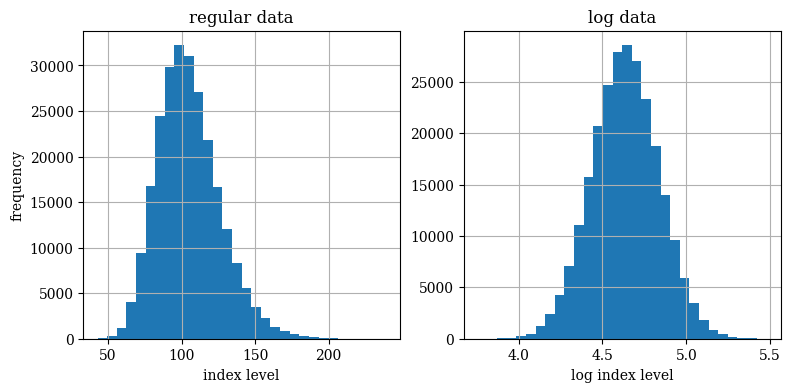

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [ ]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.87705
           max       238.96767
          mean       105.11694
           std        21.18256
          skew         0.61126
      kurtosis         0.65475


In [ ]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75834
           max         5.47633
          mean         4.63517
           std         0.19951
          skew         0.00034
      kurtosis        -0.00343


In [ ]:
normality_tests(np.log(paths[-1]))

Skew of data set           0.000
Skew test p-value          0.945
Kurt of data set          -0.003
Kurt test p-value          0.731
Norm test p-value          0.940


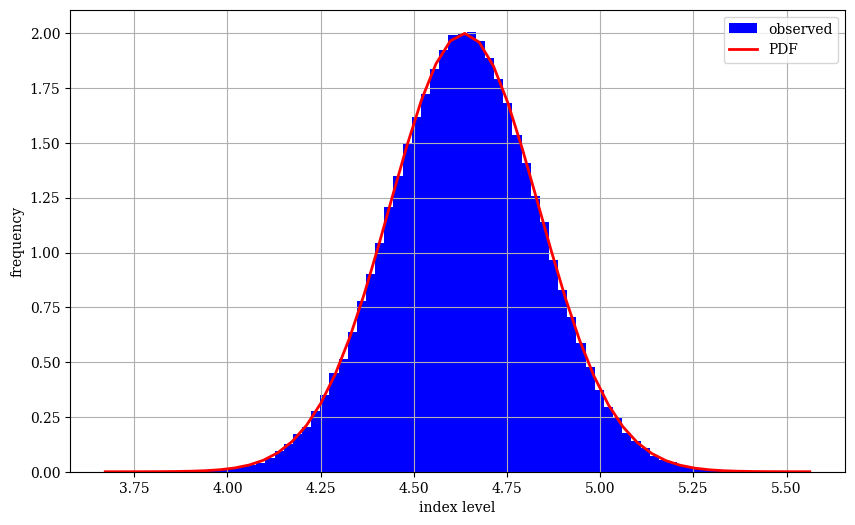

In [ ]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed', color='b')
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='PDF')
plt.legend()

Text(0, 0.5, 'sample quantiles')

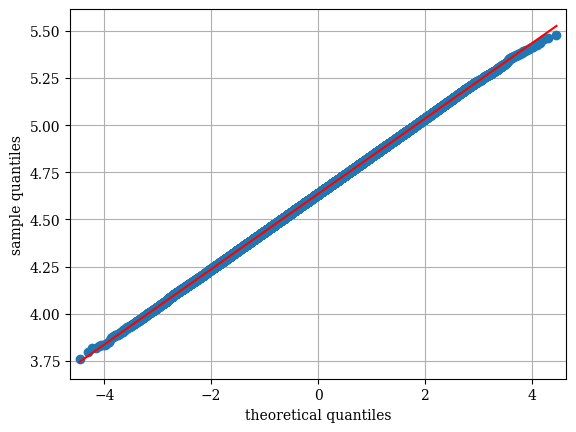

In [ ]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

## Real Data Statistics

In [ ]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade yfinance

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import yfinance as yf

In [ ]:
from datetime import datetime
start = datetime(2000,1,1)
end = datetime(2025,6,22)

In [ ]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI
data5 = yf.download('^HSCE', start, end) # HSCEI
data6 = yf.download('GLD', start, end) # GOLD

/tmp/ipython-input-30-16671842.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^GSPC', start, end) # S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-30-16671842.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('^GDAXI',start, end) # DAX
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-30-16671842.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data3 = yf.download('^KS11', start, end) # KOSPI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-30-16671842.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data4 = yf.download('^N225', start, end) # NIKKEI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-30-16671842.py:13: FutureWarning: YF.d

In [ ]:
data6.head()

Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2004-11-18,44.380001,44.490002,44.070000,44.430000,5992000
2004-11-19,44.779999,44.919998,44.470001,44.490002,11655300
2004-11-22,44.950001,44.970001,44.740002,44.750000,11996000
2004-11-23,44.750000,44.919998,44.720001,44.880001,3169200
2004-11-24,45.049999,45.049999,44.790001,44.930000,6105100


In [ ]:
data7 = pd.merge(data1[['Close']], data2[['Close']],left_index=True, right_index=True, how='inner')
data7.columns=['SP500','DAX']

data8 = pd.merge(data3[['Close']], data4[['Close']],left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI']

data9 = pd.merge(data5[['Close']], data6[['Close']],left_index=True, right_index=True, how='inner')
data9.columns=['HSCEI','GOLD']

data10 = pd.merge(data7, data8,left_index=True, right_index=True, how='inner')
data = pd.merge(data10, data9,left_index=True, right_index=True, how='inner')

In [ ]:
data.head()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,GOLD
Date,,,,,,
2004-11-18,1183.550049,4178.680176,875.840027,11082.419922,4871.189941,44.380001
2004-11-19,1170.339966,4134.890137,867.030029,11082.839844,4843.720215,44.779999
2004-11-22,1177.239990,4123.979980,849.989990,10849.389648,4830.959961,44.950001
2004-11-24,1181.760010,4125.299805,872.559998,10872.330078,4935.069824,45.049999
2004-11-26,1182.650024,4154.270020,858.119995,10833.750000,4934.390137,45.290001


In [ ]:
data.tail()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,GOLD
Date,,,,,,
2025-06-13,5976.970215,23516.230469,2894.620117,37834.250000,8655.330078,316.290009
2025-06-16,6033.109863,23699.119141,2946.659912,38311.328125,8729.990234,311.779999
2025-06-17,5982.720215,23434.650391,2950.300049,38536.738281,8694.669922,311.940002
2025-06-18,5980.870117,23317.810547,2972.189941,38885.148438,8594.190430,310.260010
2025-06-20,5967.839844,23350.550781,3021.840088,38403.230469,8527.070312,310.130005


In [ ]:
data.to_csv('stocks.csv')

<Axes: xlabel='Date'>

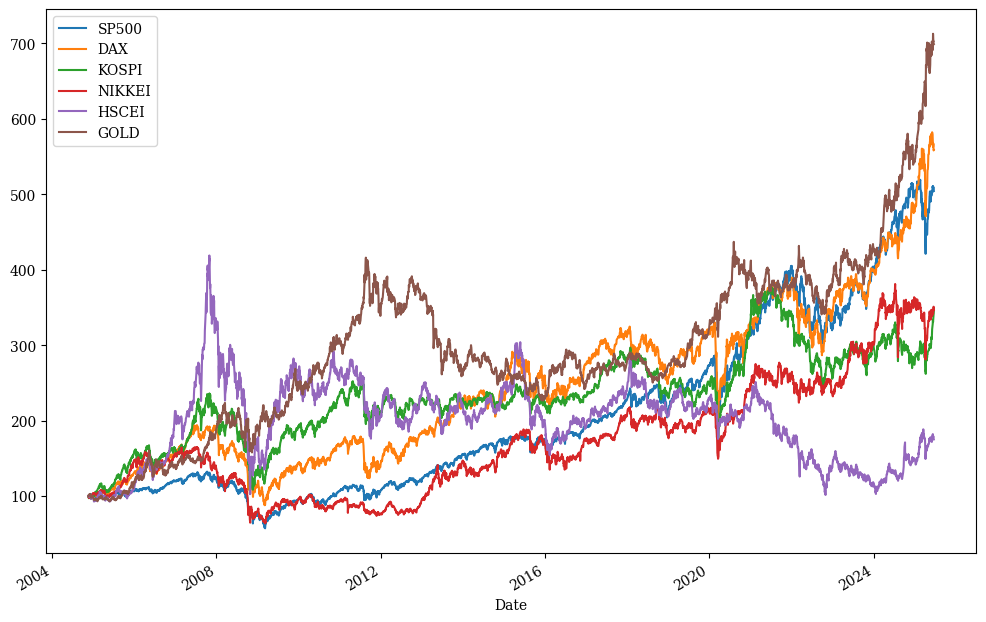

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(12, 8))

In [ ]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SP500,DAX,KOSPI,NIKKEI,HSCEI,GOLD
Date,,,,,,
2004-11-18,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-19,-0.011224,-0.010535,-0.010110,0.000038,-0.005655,0.008973
2004-11-22,0.005878,-0.002642,-0.019849,-0.021289,-0.002638,0.003789
2004-11-24,0.003832,0.000320,0.026207,0.002112,0.021322,0.002222
2004-11-26,0.000753,0.006998,-0.016687,-0.003555,-0.000138,0.005313


array([[<Axes: title={'center': 'SP500'}>,
        <Axes: title={'center': 'DAX'}>],
       [<Axes: title={'center': 'KOSPI'}>,
        <Axes: title={'center': 'NIKKEI'}>],
       [<Axes: title={'center': 'HSCEI'}>,
        <Axes: title={'center': 'GOLD'}>]], dtype=object)

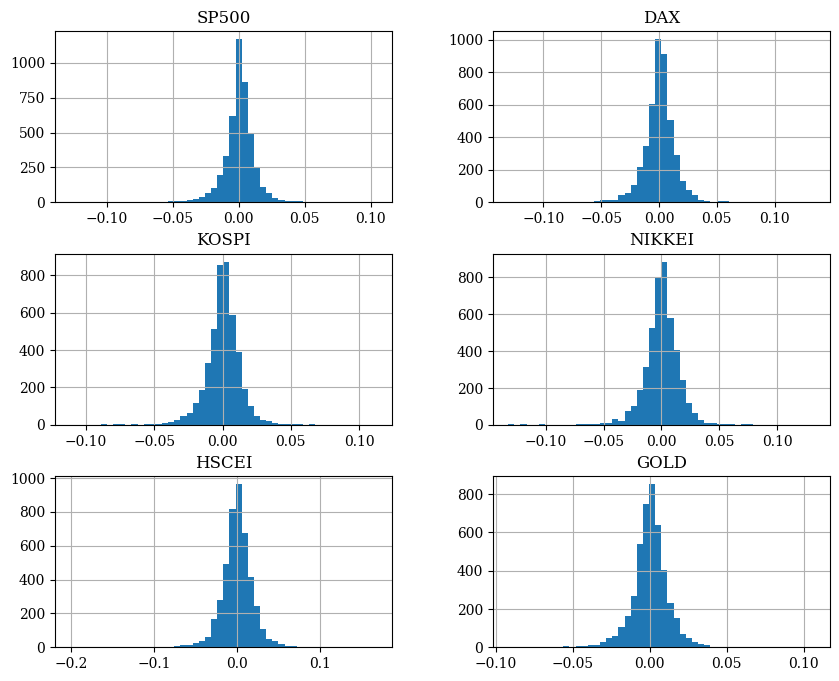

In [ ]:
log_returns.hist(bins=50, figsize=(10, 8))

In [ ]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'HSCEI', 'GOLD']

In [ ]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SP500
------------------------------
     statistic           value
------------------------------
          size      4470.00000
           min        -0.12765
           max         0.10424
          mean         0.00036
           std         0.01293
          skew        -0.53529
      kurtosis        11.95458

Results for symbol DAX
------------------------------
     statistic           value
------------------------------
          size      4470.00000
           min        -0.13055
           max         0.13463
          mean         0.00038
           std         0.01394
          skew        -0.22124
      kurtosis         8.84090

Results for symbol KOSPI
------------------------------
     statistic           value
------------------------------
          size      4470.00000
           min        -0.11172
           max         0.11284
          mean         0.00028
           std         0.01317
          skew        -0.51223
      kurtosis         8.

Text(0, 0.5, 'sample quantiles')

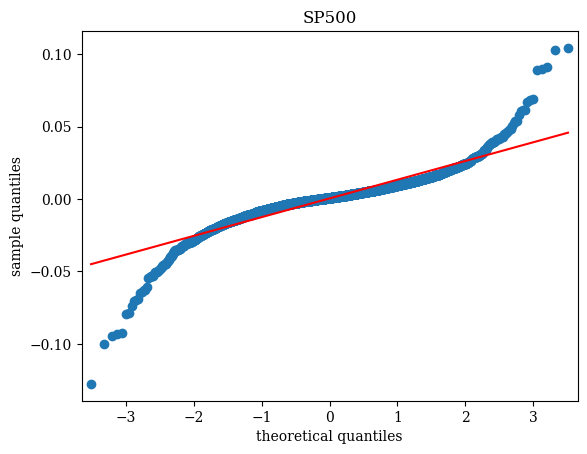

In [ ]:
sm.qqplot(log_returns['SP500'].dropna(), line='s')
plt.title('SP500')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

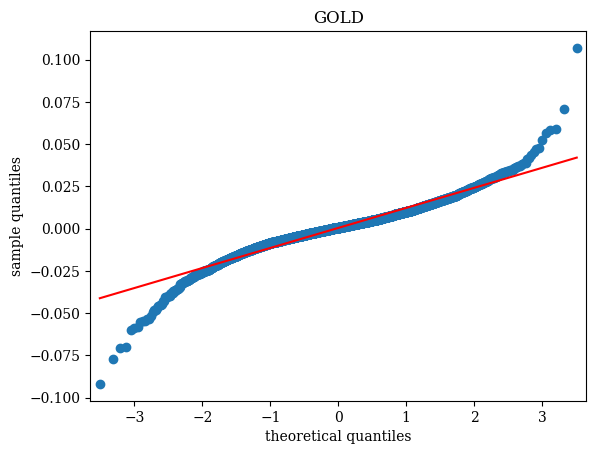

In [ ]:
sm.qqplot(log_returns['GOLD'].dropna(), line='s')
plt.title('GOLD')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [ ]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SP500
--------------------------------
Skew of data set          -0.535
Skew test p-value          0.000
Kurt of data set          11.955
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol DAX
--------------------------------
Skew of data set          -0.221
Skew test p-value          0.000
Kurt of data set           8.841
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol KOSPI
--------------------------------
Skew of data set          -0.512
Skew test p-value          0.000
Kurt of data set           8.447
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol NIKKEI
--------------------------------
Skew of data set          -0.728
Skew test p-value          0.000
Kurt of data set           9.698
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol HSCEI
--------------------------------
Skew of data set          -0.178
Skew test p-v

## Portfolio Optimization

In [ ]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI
data5 = yf.download('^HSI', start, end) # HANGSENG
data6 = yf.download('GLD', start, end) # GOLD

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data7 = pd.merge(data1[['Close']], data2[['Close']],left_index=True, right_index=True, how='inner')
data7.columns=['SP500','DAX']

data8 = pd.merge(data3[['Close']], data4[['Close']],left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI']

data9 = pd.merge(data5[['Close']], data6[['Close']],left_index=True, right_index=True, how='inner')
data9.columns=['HANGSENG','GOLD']

data10 = pd.merge(data7, data8,left_index=True, right_index=True, how='inner')
data = pd.merge(data10, data9,left_index=True, right_index=True, how='inner')

In [ ]:
data.to_csv('stocks_p.csv')

In [ ]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'HANGSENG', 'GOLD']
noa = len(symbols)

In [ ]:
rets = np.log(data / data.shift(1))

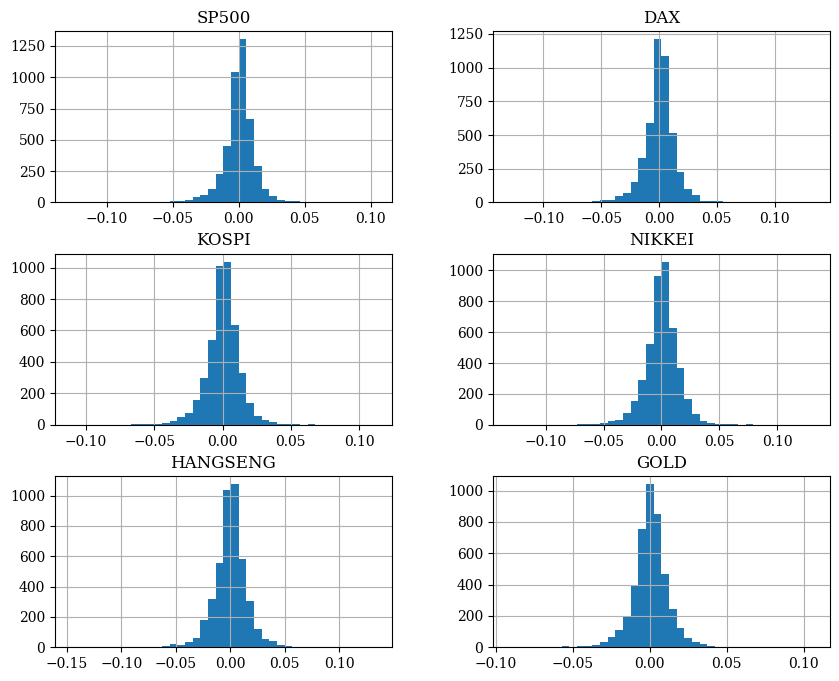

In [ ]:
rets.hist(bins=40, figsize=(10, 8));

In [ ]:
rets.mean() * 252

,0
SP500,0.088792
DAX,0.097224
KOSPI,0.061031
NIKKEI,0.068008
HANGSENG,0.028310
GOLD,0.108800


In [ ]:
rets.std()*np.sqrt(252)

,0
SP500,0.204867
DAX,0.221069
KOSPI,0.208949
NIKKEI,0.249092
HANGSENG,0.254635
GOLD,0.187668


In [ ]:
rets.cov() * 252

,SP500,DAX,KOSPI,NIKKEI,HANGSENG,GOLD
SP500,0.041970,0.027988,0.011538,0.011366,0.014432,0.002446
DAX,0.027988,0.048872,0.018568,0.022225,0.023371,0.001722
KOSPI,0.011538,0.018568,0.043660,0.034358,0.033845,0.003465
NIKKEI,0.011366,0.022225,0.034358,0.062047,0.036776,0.001387
HANGSENG,0.014432,0.023371,0.033845,0.036776,0.064839,0.004011
GOLD,0.002446,0.001722,0.003465,0.001387,0.004011,0.035219


In [ ]:
rets.corr()

,SP500,DAX,KOSPI,NIKKEI,HANGSENG,GOLD
SP500,1.000000,0.617984,0.269540,0.222722,0.276657,0.063625
DAX,0.617984,1.000000,0.401979,0.403600,0.415178,0.041498
KOSPI,0.269540,0.401979,1.000000,0.660133,0.636112,0.088361
NIKKEI,0.222722,0.403600,0.660133,1.000000,0.579816,0.029680
HANGSENG,0.276657,0.415178,0.636112,0.579816,1.000000,0.083937
GOLD,0.063625,0.041498,0.088361,0.029680,0.083937,1.000000


<Axes: xlabel='Date'>

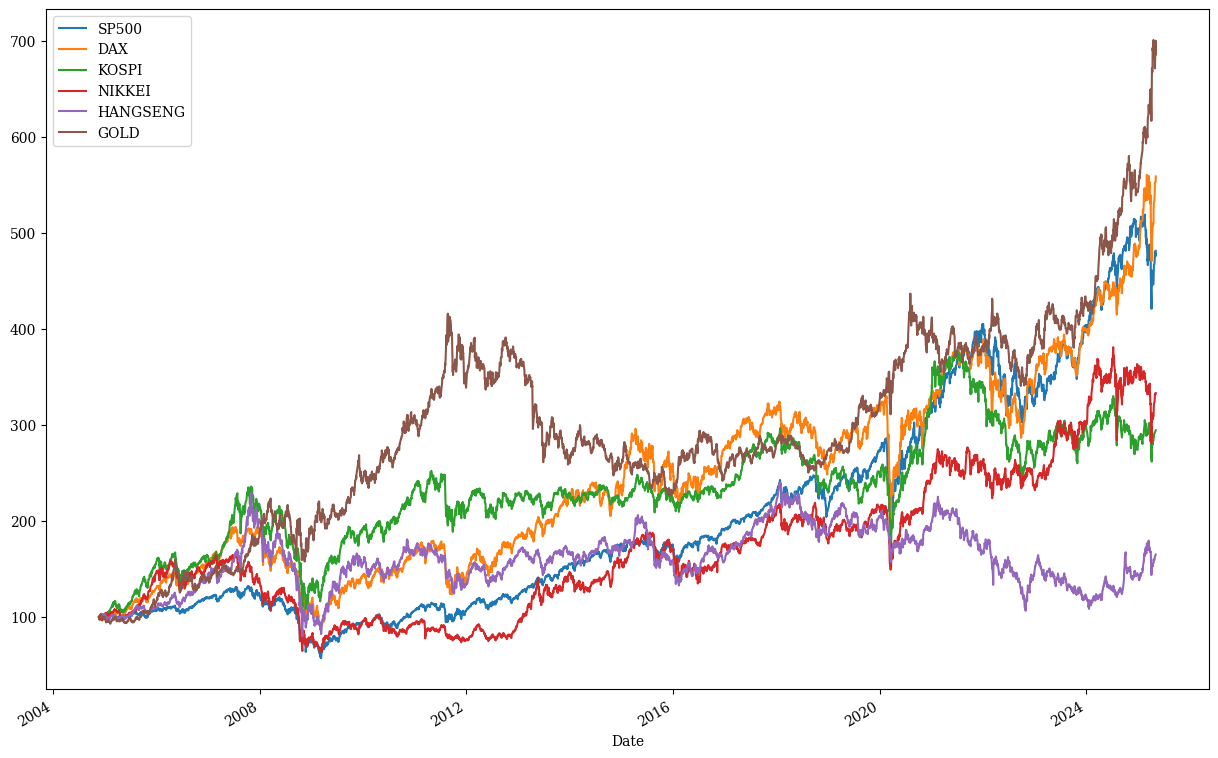

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(15, 10))

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [ ]:
weights

array([0.28965403, 0.20871242, 0.01013093, 0.20873199, 0.20897206,
       0.07379857])

In [ ]:
weights.sum()

np.float64(1.0)

In [ ]:
np.sum(rets.mean() * weights) * 252

np.float64(0.07476978553630123)

In [ ]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  # 포트폴리오 분산의 기댓값

np.float64(0.025834335436631026)

In [ ]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  # 포트폴리오 표준편차(변동성)의 기댓값

0.1607306300511232

In [ ]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [ ]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

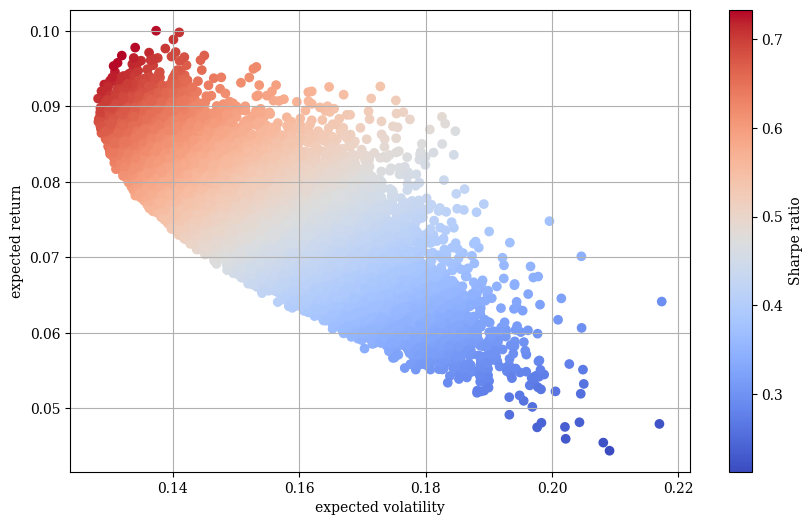

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
pvols = np.array(pvols)

In [ ]:
import scipy.optimize as sco

In [ ]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

In [ ]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
min_func_sharpe(eweights)

np.float64(-0.5082093985723914)

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 87.3 ms, sys: 0 ns, total: 87.3 ms
Wall time: 172 ms


In [ ]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7431054246005289
       x: [ 2.014e-01  1.814e-01  2.337e-02  6.985e-02  4.315e-17
            5.240e-01]
     nit: 6
     jac: [ 1.998e-04  5.819e-04  8.049e-04  1.220e-03  3.179e-01
           -4.768e-04]
    nfev: 42
    njev: 6

In [ ]:
opts['x'].round(3)

array([0.201, 0.181, 0.023, 0.07 , 0.   , 0.524])

In [ ]:
port_ret(opts['x']).round(3)

np.float64(0.099)

In [ ]:
port_vol(opts['x']).round(3)

np.float64(0.133)

In [ ]:
port_ret(opts['x']) / port_vol(opts['x'])

np.float64(0.7431054246005289)

In [ ]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.12764935582737788
       x: [ 2.419e-01  7.339e-02  1.744e-01  8.319e-02  5.728e-03
            4.213e-01]
     nit: 9
     jac: [ 1.275e-01  1.277e-01  1.276e-01  1.279e-01  1.272e-01
            1.277e-01]
    nfev: 63
    njev: 9

In [ ]:
optv['x'].round(3)

array([0.242, 0.073, 0.174, 0.083, 0.006, 0.421])

In [ ]:
port_ret(optv['x']).round(3)

np.float64(0.091)

In [ ]:
port_vol(optv['x']).round(3)

np.float64(0.128)

In [ ]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.712287153230193)

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in weights)

In [ ]:
%%time
trets = np.linspace(0.02, 0.1, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 4.35 s, sys: 7 ms, total: 4.36 s
Wall time: 4.43 s


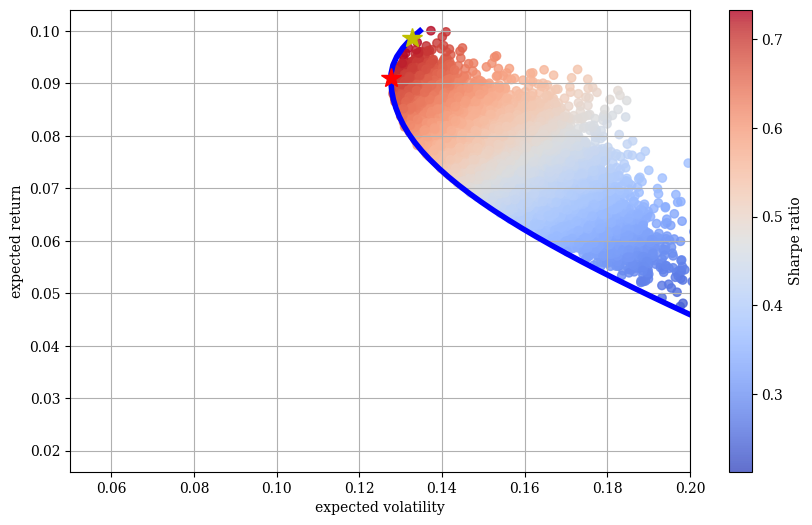

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', alpha=0.8, cmap='coolwarm')  # 무작위 포트폴리오
plt.plot(tvols, trets, 'b', lw=4.0)  # 효율적 투자선
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)   # 최대 샤프지수를 가진 포트폴리오
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)   # 최소 분산 포트폴리오
plt.grid(True)
plt.xlim([0.05, 0.2])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
bnds = len(symbols) * [(0, 1),]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [ ]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [ ]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252  # annualized
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5  # annualized
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [ ]:
opt_weights ={}
for year in range(2010, 2025):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = sco.minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow.round(4)

In [ ]:
opt_weights

{2010: array([0.    , 0.0295, 0.4445, 0.    , 0.    , 0.526 ]),
 2011: array([0.0704, 0.    , 0.    , 0.    , 0.    , 0.9296]),
 2012: array([0.    , 0.3729, 0.    , 0.3601, 0.2185, 0.0484]),
 2013: array([0.7469, 0.0502, 0.    , 0.2029, 0.    , 0.    ]),
 2014: array([0.8833, 0.    , 0.    , 0.0498, 0.    , 0.0668]),
 2015: array([0.    , 0.4339, 0.    , 0.5661, 0.    , 0.    ]),
 2016: array([0.5043, 0.    , 0.1145, 0.    , 0.    , 0.3812]),
 2017: array([0.4504, 0.    , 0.1444, 0.    , 0.1776, 0.2275]),
 2018: array([0., 0., 0., 1., 0., 0.]),
 2019: array([0.3784, 0.0539, 0.    , 0.1613, 0.    , 0.4064]),
 2020: array([0.    , 0.    , 0.4206, 0.    , 0.    , 0.5794]),
 2021: array([0.9365, 0.0635, 0.    , 0.    , 0.    , 0.    ]),
 2022: array([0., 0., 0., 0., 0., 1.]),
 2023: array([0.3889, 0.1156, 0.0267, 0.2489, 0.    , 0.2198]),
 2024: array([0.4077, 0.2616, 0.    , 0.    , 0.0066, 0.3241])}

### Fama-French 5 Factor

In [1]:
import pandas as pd
import numpy as np

!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.9 MB/s eta 0:00:00


In [2]:
from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web
from linearmodels.asset_pricing import LinearFactorModel

import yfinance as yf
import plotly.graph_objects as go

In [5]:
ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 152 entries, 2012-05 to 2024-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  152 non-null    float64
 1   SMB     152 non-null    float64
 2   HML     152 non-null    float64
 3   RMW     152 non-null    float64
 4   CMA     152 non-null    float64
 5   RF      152 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


/tmp/ipython-input-866012173.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-12')[0]
/tmp/ipython-input-866012173.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2012-05', end='2024-12')[0]


In [6]:
ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0) #리스크 프리미엄 계산: 섹터별 수익률 - 무위험 수익률
ff_portfolio_data

/tmp/ipython-input-235473637.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-12')[0]
/tmp/ipython-input-235473637.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench', start='2012-05', end='2024-12')[0]
/tmp/ipython-input-235473637.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_portfolio_data = web.DataReader('17_Industry_Portfolios', 'famafrench

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2012-05,-1.63,-14.62,-10.36,-5.49,-11.15,-9.55,-2.77,-6.48,-14.58,-5.48,-8.57,-7.58,-4.81,-0.89,-1.51,-9.20,-5.33
2012-06,4.15,6.42,5.82,-9.60,-0.85,3.27,5.09,6.22,4.78,0.48,1.32,-5.95,3.49,3.42,2.16,4.65,5.12
2012-07,0.73,-4.08,3.08,1.84,2.19,-1.26,3.05,-2.89,-1.45,1.69,1.32,-0.28,-0.81,3.50,1.65,-1.10,0.16
2012-08,-0.25,5.00,2.38,8.10,6.21,2.77,-0.45,8.88,-1.24,1.16,5.28,2.93,0.47,-3.47,2.56,4.17,2.56
2012-09,1.11,8.62,3.82,0.01,3.25,1.05,2.79,5.58,3.75,4.25,-0.18,2.38,-1.09,2.10,1.68,3.63,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,3.40,-3.58,-3.41,4.83,-1.43,-0.02,7.57,0.18,-7.33,4.46,-0.36,-4.91,1.83,4.07,1.23,2.03,2.11
2024-09,0.83,6.86,-3.79,5.14,1.68,3.60,-3.72,6.50,1.45,4.82,2.28,11.89,0.92,4.96,3.32,-0.91,2.23
2024-10,-5.43,-3.67,-0.86,-7.11,-2.83,-3.44,-4.02,-4.33,-1.91,-1.20,0.10,-3.65,-0.83,0.30,-1.30,2.25,-1.24


In [7]:
ff_factor_data = ff_factor_data.drop('RF',axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 152 entries, 2012-05 to 2024-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  152 non-null    float64
 1   SMB     152 non-null    float64
 2   HML     152 non-null    float64
 3   RMW     152 non-null    float64
 4   CMA     152 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


In [8]:
dt=ff_factor_data
dt.to_csv('ffdata.csv')

In [9]:
betas = []
for industry in ff_portfolio_data:
  step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index,industry], #종속변수
              exog=add_constant(ff_factor_data)).fit() #독립변수
  betas.append(step1.params.drop('const'))

In [10]:
betas = pd.DataFrame(betas, columns=ff_factor_data.columns, index=ff_portfolio_data.columns)
betas

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.660793,-0.085870,-0.069626,0.363771,0.500725
Mines,1.083376,0.264553,0.137482,0.233626,0.617264
Oil,1.178163,0.186876,0.933283,-0.222121,0.495487
Clths,1.023680,0.355190,-0.199873,0.632912,0.158334
Durbl,1.114690,0.587700,-0.206555,0.217807,0.189538
Chems,1.098262,0.284118,0.302258,0.197790,0.207992
Cnsum,0.714464,-0.167666,-0.334110,0.222347,0.773231
Cnstr,1.090839,0.451504,0.006062,0.501956,0.013583
Steel,1.418453,0.684136,0.468160,0.491561,0.229526
FabPr,1.008576,0.449131,0.099121,0.134759,-0.142467


In [11]:
lambdas = []
for period in ff_portfolio_data.index:
  step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index],
              exog=betas).fit()
  lambdas.append(step2.params)

In [12]:
lambdas = pd.DataFrame(lambdas, index=ff_portfolio_data.index, columns = betas.columns.tolist())
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2012-05,-5.144440,-7.830407,-3.292611,3.149394,-3.397978
2012-06,2.992797,-7.277655,5.180895,-0.497840,4.087837
2012-07,0.941593,-1.545135,-1.746218,-2.219810,1.742095
2012-08,2.456296,1.171978,-0.936397,2.423112,-2.611021
2012-09,2.196538,3.082331,-0.505286,-3.810312,3.733814
...,...,...,...,...,...
2024-08,1.886826,-11.089535,-1.323048,6.282782,-1.308426
2024-09,2.136621,4.696856,-4.740749,1.755041,-3.115539
2024-10,-1.110990,-2.151016,2.630524,-3.052843,-2.506340


In [13]:
model = LinearFactorModel(portfolios=ff_portfolio_data,
                          factors=ff_factor_data)
res = model.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6740
No. Factors:                          5   J-statistic:                    18.973
No. Observations:                   152   P-value                         0.0892
Date:                  Thu, Jul 31 2025   Distribution:                 chi2(12)
Time:                          07:51:06                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.1792     0.3631     3.2478     0.0012      0.4676      1.8908
SMB           -0.7590     0.5105    

In [14]:
window = 24
lambdas_rolling = lambdas.rolling(window).mean().dropna()
lambdas_rolling

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2014-04,1.570175,-0.819720,-0.178199,0.150345,-0.421551
2014-05,1.869822,-0.759077,0.005922,0.162352,-0.394661
2014-06,1.847921,-0.440171,-0.179879,0.132668,-0.506789
2014-07,1.689779,-0.372707,-0.043819,0.258616,-0.612341
2014-08,1.761441,-0.573653,0.009644,0.436422,-0.568196
...,...,...,...,...,...
2024-08,1.229842,-1.759905,0.389366,1.199940,-0.890861
2024-09,1.665787,-1.695193,0.346793,1.784234,-1.118829
2024-10,1.333637,-1.465193,-0.221163,1.227806,-1.355774


In [15]:
colors = ['#ce4912','#fb8500','#042c71','#0b6ab0','#ffb703']
fig = go.Figure()

for factor,i in zip(['Mkt-RF','SMB','HML','RMW','CMA'],range(0,5)):
  fig.add_trace(go.Scatter(x=lambdas_rolling.index.astype('str'), y=lambdas_rolling[factor],mode='lines',line=dict(width=1,color=colors[i]),name=factor))

fig.update_layout(
        title = dict(text = 'Fama-Macbeth Linear Regression',font = dict(size=20,color='black')),
        legend=dict(orientation="h", yanchor="bottom", y=0.93, xanchor="right", x=0.4),
        autosize = True,
        showlegend = True,
        font = dict(size = 8, color = 'black'),
        plot_bgcolor = 'white',paper_bgcolor='white',
        width=1000,height=600,
        xaxis = dict(title = 'Date', showline = True, showgrid = False, showticklabels = True, zeroline=False,mirror = True,
                    linecolor = 'black', linewidth = 0.8,ticks = 'outside'),
        yaxis = dict(title = 'Factor Risk Premium', showline = True, showgrid = False, showticklabels = True,zeroline=False, mirror = True,
                    linecolor = 'black', linewidth = 0.8,ticks = 'outside'),
        annotations=[
        dict(xref='paper',yref='paper',x=1.08,y=1.20,align='right',
            text='Information',showarrow=False,font=dict(size=8,color='red')),
        dict(xref='paper',yref='paper',x=1.08,y=1.18,align='right',
            text='Linkedin: ~/chacehkk',showarrow=False,font=dict(size=8,color='grey')),
        dict(xref='paper',yref='paper',x=1.08,y=1.16,align='right',
            text='Github: ~/hyksun2015',showarrow=False,font=dict(size=8,color='grey')),
        dict(xref='paper',yref='paper',x=1.08,y=-0.08,align='right',
            text='Source: famafrench',showarrow=False,font=dict(size=8,color='black')),
        dict(xref='paper',yref='paper',x=1.08,y=-0.1,align='right',
            text='Data period: 2012.05.01 - 2024.12.31',showarrow=False,font=dict(size=8,color='black'))])